In [1]:


import os


In [2]:

d = '../Logs/'
daily_folders = sorted([os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))])

daily_folders

['../Logs/18-05-29',
 '../Logs/18-05-30',
 '../Logs/18-05-31',
 '../Logs/18-06-01',
 '../Logs/18-06-02',
 '../Logs/18-06-03',
 '../Logs/18-06-04',
 '../Logs/18-06-05',
 '../Logs/18-06-06',
 '../Logs/18-06-07',
 '../Logs/18-06-08',
 '../Logs/18-06-09',
 '../Logs/18-06-10',
 '../Logs/18-06-11',
 '../Logs/18-06-12',
 '../Logs/18-06-13',
 '../Logs/18-06-14',
 '../Logs/18-06-15',
 '../Logs/18-06-16',
 '../Logs/18-06-17',
 '../Logs/18-06-18',
 '../Logs/18-06-19',
 '../Logs/18-06-20',
 '../Logs/18-06-21',
 '../Logs/18-06-22',
 '../Logs/18-06-23',
 '../Logs/18-06-24',
 '../Logs/18-06-25',
 '../Logs/18-06-26',
 '../Logs/18-06-27',
 '../Logs/18-06-28',
 '../Logs/18-06-29',
 '../Logs/18-06-30',
 '../Logs/18-07-01',
 '../Logs/18-07-02',
 '../Logs/18-07-03',
 '../Logs/18-07-04',
 '../Logs/18-07-05',
 '../Logs/18-07-06',
 '../Logs/18-07-07',
 '../Logs/18-07-08',
 '../Logs/18-07-09',
 '../Logs/18-07-10',
 '../Logs/18-07-11',
 '../Logs/18-07-12',
 '../Logs/18-07-13',
 '../Logs/18-07-14',
 '../Logs/18-

In [3]:
#only one file in the folders

ch5_files = sorted([os.path.join(f,o) for f in daily_folders
                   for o in os.listdir(f) 
                   if o.startswith('CH5 T')])
ch5_files

['../Logs/18-05-30/CH5 T 18-05-30.log',
 '../Logs/18-05-31/CH5 T 18-05-31.log',
 '../Logs/18-06-01/CH5 T 18-06-01.log',
 '../Logs/18-06-02/CH5 T 18-06-02.log',
 '../Logs/18-06-03/CH5 T 18-06-03.log',
 '../Logs/18-06-04/CH5 T 18-06-04.log',
 '../Logs/18-06-05/CH5 T 18-06-05.log',
 '../Logs/18-06-06/CH5 T 18-06-06.log',
 '../Logs/18-06-07/CH5 T 18-06-07.log',
 '../Logs/18-06-08/CH5 T 18-06-08.log',
 '../Logs/18-06-09/CH5 T 18-06-09.log',
 '../Logs/18-06-10/CH5 T 18-06-10.log',
 '../Logs/18-06-11/CH5 T 18-06-11.log',
 '../Logs/18-06-12/CH5 T 18-06-12.log',
 '../Logs/18-06-13/CH5 T 18-06-13.log',
 '../Logs/18-06-14/CH5 T 18-06-14.log',
 '../Logs/18-06-15/CH5 T 18-06-15.log',
 '../Logs/18-06-16/CH5 T 18-06-16.log',
 '../Logs/18-06-17/CH5 T 18-06-17.log',
 '../Logs/18-06-18/CH5 T 18-06-18.log',
 '../Logs/18-06-19/CH5 T 18-06-19.log',
 '../Logs/18-06-20/CH5 T 18-06-20.log',
 '../Logs/18-06-21/CH5 T 18-06-21.log',
 '../Logs/18-06-22/CH5 T 18-06-22.log',
 '../Logs/18-06-23/CH5 T 18-06-23.log',


In [4]:
import datetime, time
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dates,Ts = [],[]

for f in ch5_files:
    print('.',end='')
    with open(f,'r') as fi:
        for line in fi.readlines():
            parts = line.split(',')
            if len(parts) == 3:
                #parser.parse(  )
                #datetime.datetime.fromisoformat( )
                dates.append( datetime.datetime.strptime(parts[0][1:] + 'T' + parts[1],"%d-%m-%yT%H:%M:%S") )
                
                Ts.append(float(parts[2]))

..............................................................................................................................................................................................................

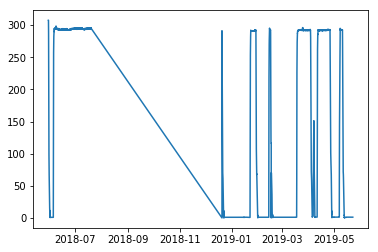

In [7]:
plt.plot_date(dates,Ts,'-')

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame({'dt':dates,'T':Ts})

In [10]:
df['epoch'] = df['dt'].apply(lambda x: x.timestamp() )
min_t = np.min(df['epoch'])
df['h'] = (df['epoch']-min_t)/3600

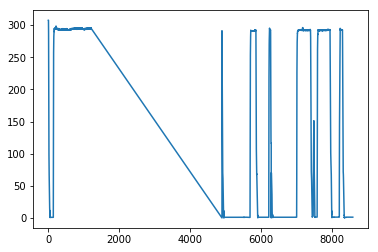

In [12]:
import json

In [13]:
def save_json(filename,obj):
    with open(filename,'w+') as f:
        json.dump(obj,f)

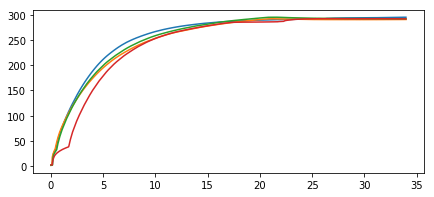

In [112]:

starts = [139,5690.4,6219.35,7583.75]
plt.figure(figsize=(7,3),)
runsletters = ['a','b','c','d']
r = {}
for start,label in zip(starts,runsletters):
    length = 35
    tdf=df[df['h'] > start-1]
    tdf=tdf[tdf['h'] < start-2+length]
    newmin= np.min(tdf['h'])
    r[label] = {
        'h': list(tdf['h']-newmin),
        'T': list(tdf['T']),
    }
    plt.plot(tdf['h']-newmin,tdf['T'],label=label)
save_json('./warmuppagani.json',r)


In [ ]:

#save_json('./300to4kelvinpagani.json',r)
plt.legend(title='Run')
plt.yscale('logit')
plt.xscale('log')
plt.xlabel('time (hours)')
plt.ylabel('Still (K)')
plt.xticks(range(0,51,5))
ax = plt.gca()
ax.yaxis.set_minor_formatter(plt.NullFormatter())

ys = np.array([1,2,5,10,50,100,200,250,290,295])
ylabels = [str(el) for el in ys]
plt.yticks(ys/300,ylabels)

xs = np.array([1,2,5,10,20,30])
xlabels = [str(el) for el in xs]
plt.xticks(xs,xlabels)
plt.xlim(0.1)
plt.grid(True)
#plt.ylim(250,300)
plt.xlim(0,30)
plt.tight_layout()
#plt.savefig('./pagani300to50cooldown.pdf')

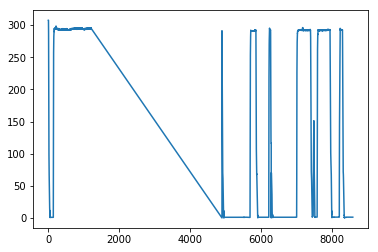

In [20]:
plt.plot(df['h'],df['T'])

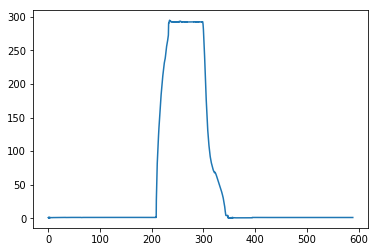

In [76]:
start = 8000
length = 1000
tdf=df[df['h'] > start]
tdf=tdf[tdf['h'] < start+length]
newmin= np.min(tdf['h'])

plt.plot(tdf['h']-newmin,tdf['T'])

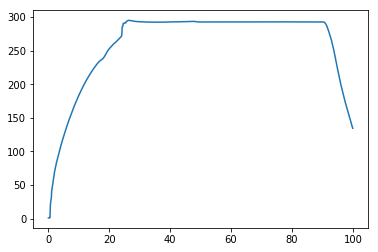

In [80]:
start = 8208
length = 100
tdf=df[df['h'] > start]
tdf=tdf[tdf['h'] < start+length]
newmin= np.min(tdf['h'])

plt.plot(tdf['h']-newmin,tdf['T'])